In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
digit_mnist=keras.datasets.mnist

In [4]:
digit_mnist=keras.datasets.mnist
(x_train_full,y_train_full),(x_test,y_test)=digit_mnist.load_data()

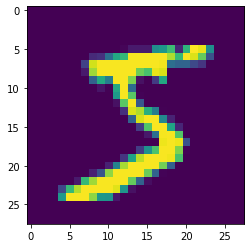

In [6]:
plt.imshow(x_train_full[0])

In [7]:
class_names=["0","1","2","3","4","5","6","7","8","9"]

In [8]:
x_train_full=x_train_full.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

In [10]:
x_train_n=x_train_full/255.
x_test_n=x_test/255.

In [11]:
x_valid,x_train =x_train_n[:6000] , x_train_n[6000:]
y_valid,y_train =y_train_full[:6000] , y_train_full[6000:]
x_test = x_test_n

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="valid",activation="relu",input_shape=[28,28,1]))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [15]:
model.compile(loss="sparse_categorical_crossentropy" ,
             optimizer="sgd",
             metrics=["accuracy"])

In [16]:
model_history=model.fit(x_train,y_train,epochs=60,
                       validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 25s 14ms/step - loss: 0.5200 - accuracy: 0.8595 - val_loss: 0.2214 - val_accuracy: 0.9358
Epoch 2/60
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2025 - accuracy: 0.9390 - val_loss: 0.1600 - val_accuracy: 0.9525
Epoch 3/60
1688/1688 [==============================] - 26s 15ms/step - loss: 0.1495 - accuracy: 0.9544 - val_loss: 0.1277 - val_accuracy: 0.9630
Epoch 4/60
1688/1688 [==============================] - 26s 15ms/step - loss: 0.1199 - accuracy: 0.9636 - val_loss: 0.1056 - val_accuracy: 0.9710
Epoch 5/60
1688/1688 [==============================] - 23s 14ms/step - loss: 0.1016 - accuracy: 0.9687 - val_loss: 0.0969 - val_accuracy: 0.9710
Epoch 6/60
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0873 - accuracy: 0.9737 - val_loss: 0.0874 - val_accuracy: 0.9737
Epoch 7/60
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0777 - accuracy: 0.9771 - val_loss: 0.0799 -

Epoch 57/60
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 0.9852
Epoch 58/60
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0686 - val_accuracy: 0.9855
Epoch 59/60
1688/1688 [==============================] - 24s 14ms/step - loss: 9.2669e-04 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9852
Epoch 60/60
1688/1688 [==============================] - 24s 14ms/step - loss: 8.6261e-04 - accuracy: 1.0000 - val_loss: 0.0701 - val_accuracy: 0.9860


In [17]:
model_history.history

{'loss': [0.5199888944625854,
  0.2025212198495865,
  0.14952513575553894,
  0.11991161108016968,
  0.10159224271774292,
  0.08727598935365677,
  0.07774603366851807,
  0.0688592866063118,
  0.06259067356586456,
  0.056644514203071594,
  0.050619881600141525,
  0.04694646969437599,
  0.042346544563770294,
  0.03910492733120918,
  0.035911377519369125,
  0.03271545469760895,
  0.03060220181941986,
  0.02667497843503952,
  0.02564901113510132,
  0.023175997659564018,
  0.021469147875905037,
  0.01957452856004238,
  0.018095867708325386,
  0.01600019261240959,
  0.015181563794612885,
  0.013800999149680138,
  0.012433156371116638,
  0.011556335724890232,
  0.010618562810122967,
  0.00933865550905466,
  0.008818300440907478,
  0.008753332309424877,
  0.007223319262266159,
  0.0065387855283916,
  0.005823398008942604,
  0.005149641074240208,
  0.004930466879159212,
  0.00405277730897069,
  0.003907009493559599,
  0.0034931874834001064,
  0.0031209364533424377,
  0.00296605727635324,
  0.002

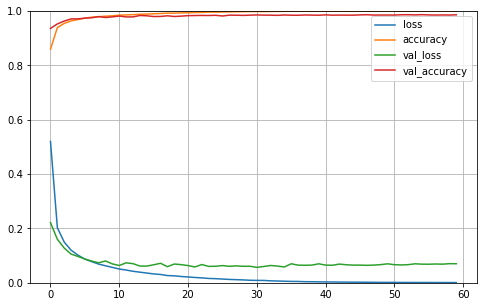

In [18]:
import pandas as pd 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 

In [19]:
model.evaluate(x_train,y_train)

1688/1688 [==============================] - 6s 4ms/step - loss: 7.5435e-04 - accuracy: 1.0000


[0.0007543484680354595, 1.0]

In [20]:
x_new=x_test[:5]

In [21]:
y_proba=model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 93ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred=np.argmax(model.predict(x_new),axis=1)
y_pred

1/1 [==============================] - 0s 17ms/step


array([7, 2, 1, 0, 4], dtype=int64)

In [23]:
np.array(class_names)[y_pred]

array(['7', '2', '1', '0', '4'], dtype='<U1')

AxesImage(54,36;334.8x217.44)


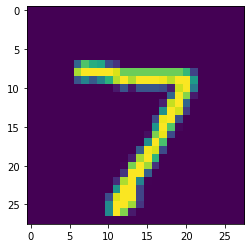

In [24]:
print(plt.imshow(x_test[0]))

## Another model with filter 64

In [25]:
model_b=keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="valid",activation="relu",input_shape=[28,28,1]))
model_b.add(keras.layers.MaxPooling2D((2,2)))

model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(200,activation="relu"))
model_b.add(keras.layers.Dense(100,activation="relu"))
model_b.add(keras.layers.Dense(10,activation="softmax"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [29]:
model_b.compile(loss="sparse_categorical_crossentropy" ,
             optimizer="sgd",
             metrics=["accuracy"])

In [30]:
model_b_history=model.fit(x_train,y_train,epochs=60,
                       validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 22s 13ms/step - loss: 8.4778e-04 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9852
Epoch 2/60
1688/1688 [==============================] - 21s 12ms/step - loss: 8.3303e-04 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9858
Epoch 3/60
1688/1688 [==============================] - 21s 12ms/step - loss: 8.1228e-04 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9855
Epoch 4/60
1688/1688 [==============================] - 24s 14ms/step - loss: 7.7668e-04 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9860
Epoch 5/60
1688/1688 [==============================] - 24s 14ms/step - loss: 7.2661e-04 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9857
Epoch 6/60
1688/1688 [==============================] - 25s 15ms/step - loss: 7.1108e-04 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9847
Epoch 7/60
1688/1688 [==============================] - 25s 15ms/step - loss: 6.8023e-04 - accuracy:

1688/1688 [==============================] - 25s 15ms/step - loss: 2.5033e-04 - accuracy: 1.0000 - val_loss: 0.0794 - val_accuracy: 0.9853
Epoch 56/60
1688/1688 [==============================] - 24s 14ms/step - loss: 2.4564e-04 - accuracy: 1.0000 - val_loss: 0.0792 - val_accuracy: 0.9858
Epoch 57/60
1688/1688 [==============================] - 24s 14ms/step - loss: 2.4212e-04 - accuracy: 1.0000 - val_loss: 0.0803 - val_accuracy: 0.9853
Epoch 58/60
1688/1688 [==============================] - 24s 14ms/step - loss: 2.4108e-04 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9853
Epoch 59/60
1688/1688 [==============================] - 24s 14ms/step - loss: 2.3494e-04 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9855
Epoch 60/60
1688/1688 [==============================] - 24s 14ms/step - loss: 2.3077e-04 - accuracy: 1.0000 - val_loss: 0.0802 - val_accuracy: 0.9858


In [31]:
model_b_history.history

{'loss': [0.0008477839292027056,
  0.0008330316049978137,
  0.000812281621620059,
  0.0007766760536469519,
  0.0007266058819368482,
  0.0007110821316018701,
  0.0006802314310334623,
  0.0006527348305098712,
  0.0006275126943364739,
  0.0006184988305903971,
  0.0005995120154693723,
  0.000575956713873893,
  0.0005856879288330674,
  0.000544434878975153,
  0.000540994806215167,
  0.0005191036034375429,
  0.0005152627709321678,
  0.0004906354588456452,
  0.00048206071369349957,
  0.00047997874207794666,
  0.0004666688328143209,
  0.00044811784755438566,
  0.00044418632751330733,
  0.0004300225991755724,
  0.0004173559136688709,
  0.00041556041105650365,
  0.00040200119838118553,
  0.000396442279452458,
  0.0003864899626933038,
  0.0003777027886826545,
  0.00037067197263240814,
  0.0003643175004981458,
  0.0003607851976994425,
  0.000353505922248587,
  0.0003408905758988112,
  0.0003334373759571463,
  0.0003375827509444207,
  0.0003263783873990178,
  0.0003185415989719331,
  0.000317808531

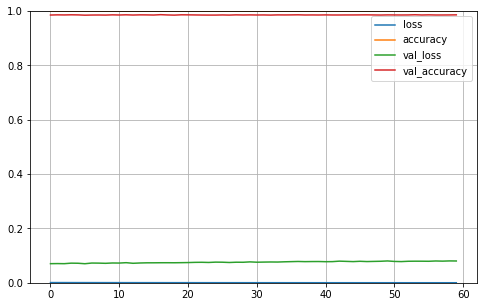

In [32]:
import pandas as pd 
pd.DataFrame(model_b_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show() 